# **Importing important libraries**
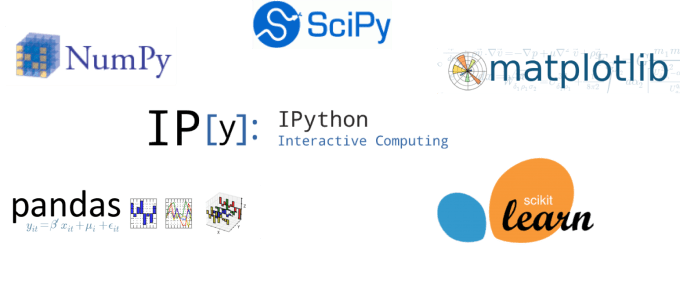

In [ ]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)

# Generating data using make_regression function

In [ ]:
#making synthetic data for regression
X,y = make_regression(n_samples=100, n_features = 1, n_informative = 1, n_targets=1, noise= 20)

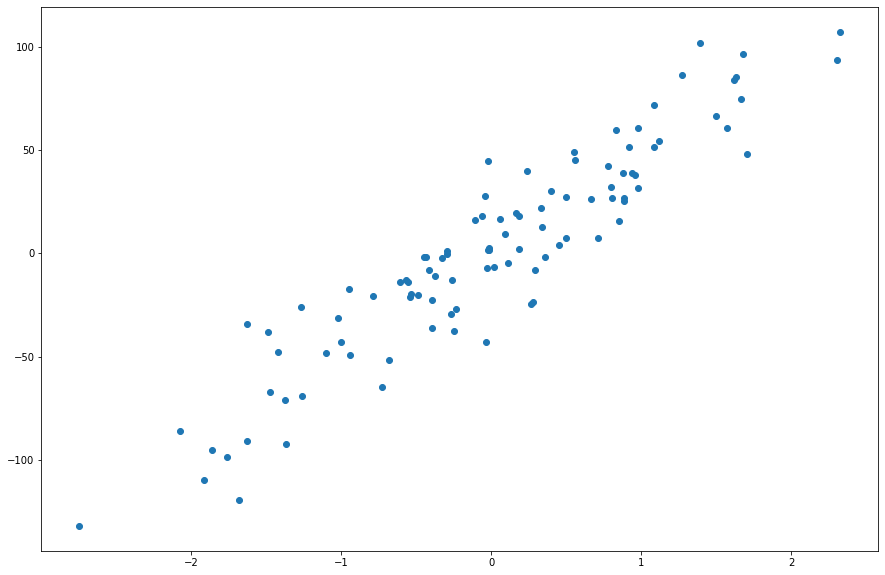

In [ ]:
#plotting data on scatter plot to see the linear relationship
plt.scatter(X,y)

# Creating a dataframe of generated data points

In [ ]:
#creating matrix by appending the two array X & y
df_matrix = np.append(X,y.reshape(-1,1),axis=1)

In [ ]:
#creating dataframe with both the columns i.e 'feature', 'target'
index_list = list(range(0, len(X)))
df = pd.DataFrame(df_matrix, index = index_list, columns = ['feature', 'target'])

In [ ]:
#visualising dataframe
df.head()

,feature,target
0,-1.259992,-69.022855
1,-1.367727,-91.826604
2,-1.266958,-25.823765
3,-0.391758,-22.564746
4,2.329019,107.058171


# Splitting data to Train Test 

In [ ]:
#splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(df[['feature']], df[['target']], test_size = 0.2, random_state = 2)

# Modeling 

## ScikitLearn Library

In [ ]:
#creating lr object of LinearRegression class
lr = LinearRegression()

In [ ]:
#fitting model on to the train dataset
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting on the X_test
prediction = lr.predict(X_test)

In [ ]:
print("MSE",mean_squared_error(y_test,prediction))

MSE 411.9957513808182


In [ ]:
feature_coefficient = lr.coef_[0][0]
intercept = lr.intercept_[0]
print('Coefficient of feature: ', feature_coefficient, '\nintercept: ', intercept)

Coefficient of feature:  46.70538670592748 
intercept:  0.13511402764376834


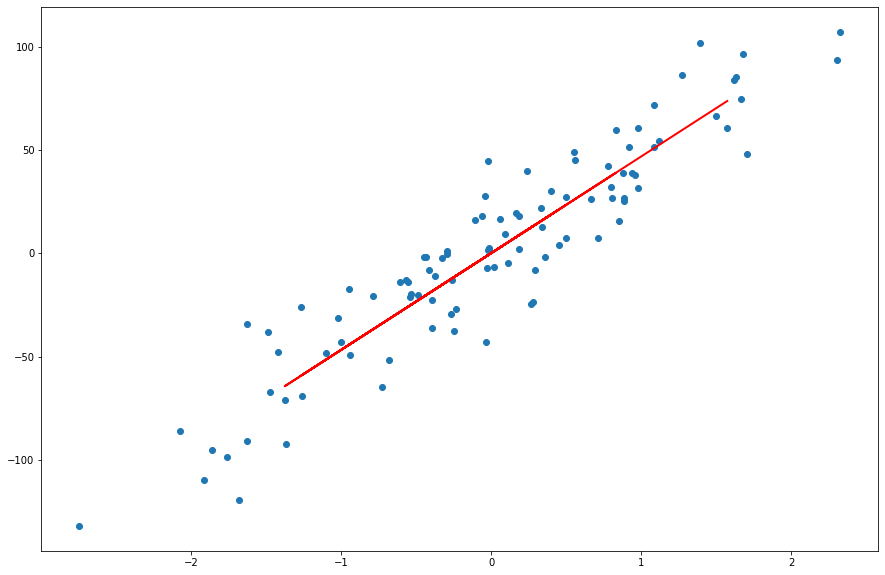

In [ ]:
plt.scatter(df['feature'], df['target'])
plt.plot(X_test, prediction, 'r-', linewidth = 2)

## Personal Library (Uisng OLS method)

In [ ]:
class LinearRegression_personal:

  def __init__(self, m = None, b = None):
    self.m = m
    self.b = b

  def fit(self, X_train, y_train):
    numerator = 0
    denominator = 0

    for i in range(X_train.shape[0]):
      numerator = numerator + ((X_train.iloc[i, 0]- X_train.mean()[0])*(y_train.iloc[i, 0] - y_train.mean()[0]))
      denominator = denominator + ((X_train.iloc[i, 0]-X_train.mean()[0]) * (X_train.iloc[i, 0]-X_train.mean()[0]))
    
    self.m = numerator /denominator
    self.b = y_train.mean()[0] - (self.m * X_train.mean()[0])
    print('coefficient of variable: ',self.m, '\nintercept of the line: ', self.b)

  def predict(self, X_test):
    for i in range(X_test.shape[0]):
      predicted_value = self.m*X_test.iloc[i, 0] + self.b
      print(predicted_value)

In [ ]:
p_lr = LinearRegression_personal()

In [ ]:
p_lr.fit(X_train, y_train)

coefficient of variable:  46.70538670592744 
intercept of the line:  0.13511402764377012


In [ ]:
p_lr.predict(X_test)

-13.572651950595196
13.961281315371675
-64.1495430282952
-31.74931060255984
-0.9395990037010304
18.925095329430597
-59.03864568718264
-0.7900730361357707
12.5559672577129
-25.667022463173293
23.401293104267292
-44.057226849122486
38.90799396525897
-11.957125235689826
-58.713322890435684
-4.785403253992325
-18.162098810349327
21.415967243188348
7.976270596468488
73.66451294937883


### Gradient Descent 

In [ ]:
class GradientDescentRegressor:

  def __init__(self, m = None, c = None, learning_rate = None, epochs = None):
    self.m = 0
    self.c = 0
    self.learning_rate = learning_rate
    self.epochs = epochs

  def fit(self, X, y):
    for i in range(self.epochs):

      Y_pred = self.m * X.iloc[:, 0].ravel() + self.c

      D_m = (-2/(X.shape[0])) * np.sum(X.iloc[:, 0].ravel() * (y.iloc[:, 0].ravel() - Y_pred))
      D_c = (-2/(X.shape[0])) * np.sum((y.iloc[:, 0].ravel() - Y_pred))

      self.m = self.m - self.learning_rate * D_m
      self.c = self.c - self.learning_rate * D_c

    print(self.m, self.c)

  def predict(self, X_test):
     for i in range(X_test.shape[0]):
      predicted_value = self.m*X_test.iloc[i, 0] + self.c
      print(predicted_value)

In [ ]:
lr = GradientDescentRegressor(learning_rate= 0.01, epochs = 1000)


In [ ]:
lr.fit(X_train, y_train)

46.7053866977837 0.1351140495899547


In [ ]:
lr.predict(X_test)

-13.57265192625887
13.961281334907074
-64.14954299514008
-31.74931057505416
-0.9395989815674546
18.925095348100488
-59.03864565491869
-0.7900730140282668
12.555967277493338
-25.667022436728146
23.401293122156694
-44.057226819470756
38.90799398044456
-11.95712521163519
-58.71332285822846
-4.785403231188178
-18.16209878521277
21.41596726142392
7.976270617047457
73.66451295850413
